# Part $\mathcal{I}$ : [50%]

## 1.1 Linear Regression

### 1.1: Question 1

 Equation for k=1 : f(x) =  2.5

 Equation for k=2 : f(x) =  0.40000000000000013 x +  1.4999999999999996

 Equation for k=3 : f(x) =  1.5000000000000033 x**2 +  -7.100000000000019 x +  9.000000000000025

 Equation for k=4 : f(x) =  1.3333333333336272 x**3 +  -8.500000000002228 x**2 +  15.166666666671695 x +  -5.000000000003212

 For k =  1 , the MSE is equal to  3.25

 For k =  2 , the MSE is equal to  3.0500000000000003

 For k =  3 , the MSE is equal to  0.7999999999999992

 For k =  4 , the MSE is equal to  3.863840713772516e-26


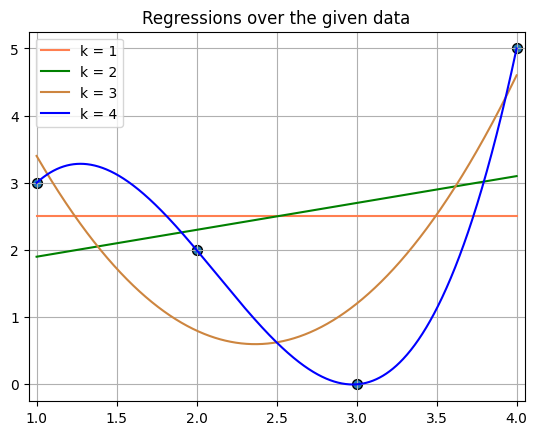

In [2]:
import numpy as np
import matplotlib.pyplot as plt


k_set = [1, 2, 3, 4]
x_values = np.array([1, 2, 3, 4])
y_values = np.array([3, 2, 0, 5])


def fitting_dataset(x_values: list, y_values: list, k_set: list):
    """ 
    Calculates the coefficients of the fitted data set of points.

    Parameters
    ----------
    x_values : list
        The x-coordinates of the data set we want to fit
    y_values : list
        The y-coordinates of the data set we want to fit
    k_set : list
        The set of dimensions k for the fitting
    
    Returns
    -------
    coeff_q1 : numpy.ndarray
        An array containing lists of the coefficients for the fitted curves
        The array is of shape (len(k_set), 1). The lists are of length k_i, 
        for each k_i in k_set.
    """

    # x and y must be of same length, because each point has x and y coordinates
    if len(x_values) != len(y_values):
        print("The x and y datasets must be the same length")
        raise ValueError

    # initializing the output, 
    coeff_q1 = np.empty(len(k_set), dtype=object)
    
    # Iterating over k_set while keeping track of the indexes
    for index, k_i in enumerate(k_set):

        if k_i > 1:

            # Creating a Vandermonde Matrix:
            # - each column is the dimension k_i - 1 (for the power of x)
            # - each line correspond to each element from x_value, which will be raised
            #    to every power in the k_i list.
            X = np.vander(x_values, (k_i), increasing=True)

            # Solving to find the weights
            # N.B. Could not find the solution without the np.linalg.solve function
            w = np.linalg.solve(X.T @ X, X.T @ y_values)

            # Storing each weights in the output array
            coeff_q1[index] = np.array(w)

        # Exception for k = 1, because we fit the average of the values as weights
        else:
            w = [(1/len(y_values))*np.sum(y_values)]
            coeff_q1[index] = np.array(w)
    
    # Equations printed out nicely for each dimension k
    print(" Equation for k=1 : f(x) = ", coeff_q1[0][0])
    print("\n Equation for k=2 : f(x) = ", coeff_q1[1][1], 'x + ', coeff_q1[1][0])
    print("\n Equation for k=3 : f(x) = ", coeff_q1[2][2], "x**2 + ", coeff_q1[2][1], 'x + ', coeff_q1[2][0])
    print("\n Equation for k=4 : f(x) = ", coeff_q1[3][3], "x**3 + ", coeff_q1[3][2], "x**2 + ", coeff_q1[3][1], 'x + ', coeff_q1[3][0])
    
    return coeff_q1

def mse_fitted_curves(coeff_q1, x_values: list, y_values:list, k_set: list):
    """
    Calculates the Mean-Squared Error (MSE) of each of the fitted data curves.

    Parameters
    ----------
    coeff_q1 : numpy.ndarray
        An array containing lists of the coefficients for the fitted curves
        The array is of shape (len(k_set), 1). The lists are of length k_i, 
        for each k_i in k_set.
    x_values : list
        The x-coordinates of the data set we want to fit
    y_values : list
        The y-coordinates of the data set we want to fit
    k_set : list
        The set of dimensions k for the fitting
    
    Returns
    -------
    MSE_q1 : list
        Each element of the list is the MSE of the corresponding dimension in k_set
    """

    # Initializing the results list
    MSE_q1 = []
    
    # Iterating on the number of dimensions provided
    for i in range(len(k_set)):

        # Calculating the predicted values for the fitted polynomial of degree k-1
        y_predicted = np.polyval(coeff_q1[i][::-1], x_values)  

        # Calculating the mean squared error for that given dimension
        meansquarederror = (1/len(y_values))*np.sum((y_predicted-y_values)**2)

        # Adding that calculated mean squared error to the results list
        MSE_q1.append(meansquarederror)
    
    # Printing the obtained MSE for each dimension k
    for i in range(len(k_set)):
        print("\n For k = ", i+1, ", the MSE is equal to ", MSE_q1[i])
    
    return MSE_q1


def plot_fitted_curves(coeff_q1, x_values, y_values, save_plot=False, title_plot="regression_q1.png"):
    """ 
    Plots the fitted curves to the dataset.

    Parameters
    ----------
    coeff_q1 : numpy.ndarray
        An array containing lists of the coefficients for the fitted curves
        The array is of shape (len(k_set), 1). The lists are of length k_i, 
        for each k_i in k_set.
    x_values : list
        The x-coordinates of the data set we want to fit
    y_values : list
        The y-coordinates of the data set we want to fit
    k_set : list
        The set of dimensions k for the fitting
    save_plot : bool (optional)
        Variable to decide whether saving the plot or not
    title_plot : str (optional)
        Title of the plot saved

    Returns
    -------

    """

    # Defining the colors of each curve plotted for corresponding dimension in k_set
    colors = ["coral", "green", "peru", "blue"]

    plt.figure()
    for i, k_i in enumerate(k_set):
        x_axis = np.linspace(1, 4, 1000)
        y_axis = np.polyval(coeff_q1[i][::-1], x_axis)    
        plt.plot(x_axis, y_axis, color=colors[i], label=f'k = {k_i}')
    plt.scatter(x_values, y_values, s=50, edgecolors='black')
    plt.xlim([0.95, 4.05])
    plt.title("Regressions over the given data")
    plt.grid()
    plt.legend()
    if save_plot == True:
        plt.savefig(title_plot, format='png', dpi=300, bbox_inches='tight')
    plt.show()


# Inputs required by the question
k_set = [1, 2, 3, 4]
x_values = np.array([1, 2, 3, 4])
y_values = np.array([3, 2, 0, 5])

# Calculating the coefficients of the fitted curves (also printing them down)
coeff_q1 = fitting_dataset(x_values, y_values, k_set)

# Calculating and printing the MSE of each curve fitted
MSE_q1 = mse_fitted_curves(coeff_q1, x_values, y_values, k_set)

# Plotting each fitted curve and the data set
plot_fitted_curves(coeff_q1, x_values, y_values, save_plot=False)


### 1.1: Question 2.(a)

#### Q2.(a).(i)

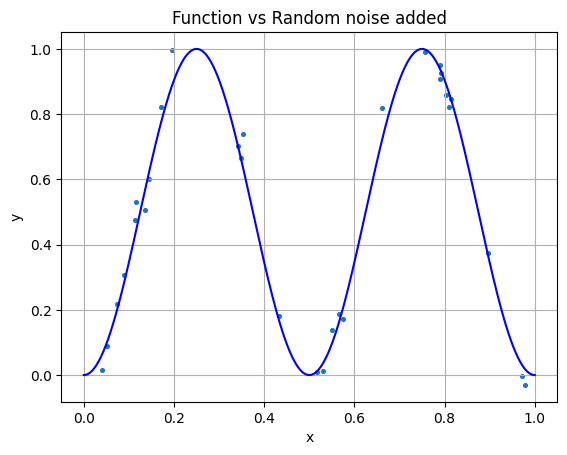

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def uniform_samples(low, high, n_samples):
    """"
    Draws uniform samples from a given interval

    Parameters
    ----------
    low : float
        Lower bound of the sampling interval
    high : float
        Higher bound of the sampling interval
    n_samples : int or tuple of ints
        Number of samples to draw. If given a tuple, gives back
        a numpy.ndarray of given shape.

    Returns
    -------
    samples : scalar or numpy.ndarray
        Uniform samples drawn
    """

    # Using np.random.uniform is pretty straightforward
    samples = np.random.uniform(low, high, n_samples)

    return samples

def normal_samples(mean, var, n_samples):
    """
    Draws normal samples from a given set of parameters (mean and variance)

    Parameters
    ----------
    mean : float
        Mean of the normal distribution from which we sample
    std : float
        Standard deviation of the normal distribution from which we sample
    n_samples : int or tuple of ints
        Number of samples to draw. If given a tuple, gives back
        a numpy.ndarray of given shape.
    Returns
    -------
    samples : scalar or numpy.ndarray
        Sampled values from the normal distribution. 
        Scalar in the case of n_samples = 1.
        Otherwise, numpy.ndarray of dimensions n_sample
    """

    # Similarly to uniform samples, it is pretty straightforward
    samples = np.random.normal(mean, var, n_samples)

    return samples

def sine_func(x: float):
    """" 
    Calculates the values of the sinusoidal function sin^2 (2 pi x) for a given x value

    Parameters
    ----------
    x : float
        x-coordinate of the point we want to estimate
    
    Returns
    -------
    y : float
        Calulated y-coordinate of the function for given input
    """

    # Calculates the square of the sin( 2 pi x) function
    y = np.square(np.sin(2*(np.pi)*x))

    return y

def g_sig(values, noise):
    """ 
    Evaluates the g function for given x-coordinate and random noise sampled.

    Parameters
    ----------
    values : numpy.ndarray
        x-coordinates of the points we want to estimate
    noise : numpy.ndarray
        noise added over the datapoints

    Returns
    -------
    g_x : numpy.ndarray
        Array of shape (np.shape(values)[0], ) containing the data points estimated from function g.
        They will become the y-coordinates of our training data.
    """

    # Verifying values and noise have the same dimensions, at least
    # on the first dimension
    if np.shape(values)[0] != np.shape(noise)[0]:
        print("Input values and noise must be of the same size")
        raise ValueError

    # Initializing the output
    g_x = np.zeros((np.shape(values)[0],))

    # Calculating the image of x from the function g
    for i in range(np.shape(values)[0]):
        g_x[i] = sine_func(values[i]) + noise[i]

    return g_x


def training_data_gen():
    """
    Generating the 30 training data points for dataset S

    Parameters
    ----------
    
    Returns
    -------
    x_data: np.ndarray
        Shape (30,), containing all the x-coordinates for training points
    y_data: np.ndarray
        Shape (30,), containing all the y-coordinates for training points
    """

    n_samples = 30
    std_norm = 0.07

    noise = normal_samples(0, std_norm, n_samples)
    x_data = uniform_samples(0, 1, n_samples)
    y_data = g_sig(x_data, noise)

    return x_data, y_data

def plot_data_q2(x_data, 
                 y_data, 
                 save_fig = False, 
                 title:str="Part 1 Figures/Part 1 Figures/data_created_q1.png",
                 title_plot:str="Function vs Random noise added"
                 ):
    """
    Given the generated training datapoints, the function plots the sin^2 (2 pi x) over
    the training data set

    Parameters
    ----------
    x_data : np.ndarray
        Shape (30,), containing all the x-coordinates for training points
    y_data : np.ndarray
        Shape (30,), containing all the y-coordinates for training points
    save_fig : bool
        Variable to decide whether saving the plot or not
    title : str
        Title of the plot if saved

    Returns
    -------

    """

    # Generating the x-data for the sin^2 (2 pi x) function
    x_axis = np.linspace(0, 1, 10000)

    plt.figure()
    plt.plot(x_axis, sine_func(x_axis), color='blue')
    plt.scatter(x_data, y_data, s=7)
    plt.grid()
    plt.title(title_plot)
    plt.xlabel("x")
    plt.ylabel("y")
    if save_fig:
        plt.savefig(title, format='png', dpi=300, bbox_inches='tight')
    plt.show()
    

# Generating the training data
x_data, y_data = training_data_gen()

# Plotting it on top of the original function
plot_data_q2(x_data, y_data)

#### Q2.(a).(ii)

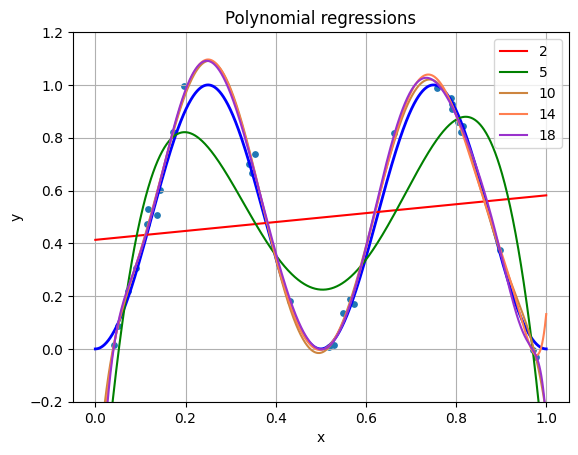

In [4]:
def poly_regression(x, y, k):
    """ 
    Performs the regression of dimension k over the dataset (x_i,y_i), x_i in x, y_i in i
    for polynomial basis

    Parameters
    ----------
    x : np.ndarray
        x-coordinates of the dataset to fit
    y : np.ndarray
        y-coordinates of the dataset to fit
    k : int
        Dimension of the regression

    Returns
    -------
    w : np.ndarray
        Vector containing the coefficients of the fitted curves to the dataset
    """

    # Ensuring x and y are in type numpy.ndarray
    x = np.array(x)
    y = np.array(y)
    
    # Creating the Vandermonde matrix, similarly to question 1
    X = np.vander(x, k, increasing=True)

    # Calculating the weights for our datasets, given its Vandermonde matrix
    w = np.linalg.solve(X.T @ X, X.T @ y)
    
    return w

def poly_function(coeff, min=0, max=1, num_points=1000):
    """ 
    Calculates the values of the polynomial given its coefficient. 
    Useful to calculate the and then plot the fitted curve to our dataset.

    Parameters
    ----------
    coeff : numpy.ndarray
        Contains the calculated coefficients for the fitted polynomial
        Each index correspond to the element at same index in the k_set
    min : float (optional)
        Minimum x-value for the polynomial function fitted to be plotted.
    max : float (optional)
        Maximum x-value for the polynomial function fitted to be plotted.
    num_points : int (optional)
        Number of points on the x-axis for the polynomial function.

    Returns
    -------
    x_range : numpy.ndarray
        The x-coordinates corresponding to the range [min, max]
    y_poly : numpy.ndarray
        The y-coordinates of the fitted function on range [min, max]
    """

    # I don't believe there needs to be any comments necessary
    # outside of the dotstring, it is pretty straightforward.

    x_range = np.linspace(min, max, num_points)

    y_poly = np.polyval(coeff[::-1], x_range)

    return x_range, y_poly

def regression_k(x, y, k: int = 2, specific_dims: bool = False, dims = [2]):
    """ 
    Performs the regression the given dataset, given the dimension(s) k of the regression

    Parameters
    ----------
    x : np.ndarray
        Should be in one dimension, array containing the x-coordinates of the dataset used for 
        the regression.
    y : np.ndarray
        Same as x, should be in one dimension, array containing the y-coordinate of the dataset
        used for the regression.
    k : int
        The regression is performed on every value from 1 to k.
    specific_dims : bool (optional)
        If set to True, the regression is performed on the dataset in every dimension contained 
        in the list dims. 
        If not, the regression is performed on every dimension up to k.
    dims : list (optional)
        List containing all the dimensions k on which to perform the regressions if specific_dims is
        set to True.

    Returns
    -------
    all_coeffs : np.ndarray
        Contains the lists of coefficients for the fitted polynomial to the dataset.
    """

    # Checks if we only do the regression on one dimension or we want to calculate
    # it for multiple dimensions
    if not specific_dims:

        # Initialize the output to be an array of length k, each positition will be the
        # coefficient list of the dimensions from 1 to k.
        all_coeffs = np.empty(k, dtype=object)

        # Iterate over each int until the dimension k
        for start in range(0, k):

            # start ranges from 0 to k-1, so we increase start to have the poly_regression
            # function calculated in the right way, but stored in the all_coeffs at the position
            # where it should be.
            all_coeffs[start] = np.array(poly_regression(x, y, (start+1)))

    # If we perform the regression only on specific dimensions, e.g. [2, 5, 10, 14, 18]
    else:
        # Initialize output
        all_coeffs = np.empty(len(dims), dtype=object)

        index = 0
        for k_i in dims:
            # Same as before, but the corresponding index is not matching with the dimension
            # explaining why we introduce the index variable
            all_coeffs[index] = np.array(poly_regression(x, y, k_i))
            index += 1

    return all_coeffs

def k_polynomials_plot(x_data, y_data, coeff_data, k_set: list):
    """ 
    Plots the fitted functions for each dimension

    Parameters
    ----------
    x_data : numpy.ndarray
        Contains the x-coordinates of the training dataset
    y_data : numpy.ndarray
        Contains the y-coordinates of the training dataset
    coeff_data : numpy.ndarray
        Contains the coefficients of all the fitted polynomials to the dataset.
    k_set : list
        Contains the dimensions k, used for labels of the plot.
    
    Returns
    -------

    """

    # Calculating the x and y coordinates of the polynomial function fitted,
    # using the coefficients.
    x = np.empty(len(coeff_data), dtype=object)
    y = np.empty(len(coeff_data), dtype=object)

    for i, c in enumerate(coeff_data):
        x[i], y[i] = poly_function(c)

    base = np.linspace(0, 1, 10000)

    colors = ["red", "green", "peru", "coral", "darkorchid"]

    labels = k_set

    plt.figure()
    plt.plot(base, sine_func(base), color='blue', linewidth=2)
    plt.scatter(x_data, y_data, s=15)
    for i in range(len(x)):
        plt.plot(x[i], y[i], color=colors[i], label=labels[i]) 
    plt.grid()
    plt.legend()
    plt.title("Polynomial regressions")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.2, 1.2])
    plt.savefig("Part 1 Figures/k_regression.png", format='png', dpi=300, bbox_inches='tight')
    plt.show()



# Defining the dimensions on which to perform the regression
k_set = [2, 5, 10, 14, 18]

# Finding the coefficients of the fitted curve for each dimension
coefficients_q2aii = regression_k(x_data, y_data, k=2, specific_dims=True, dims=k_set)

# Plotting the fitted curves over the training dataset
k_polynomials_plot(x_data=x_data, y_data=y_data, coeff_data=coefficients_q2aii, k_set=k_set)

### 1.1: Question 2.(b)

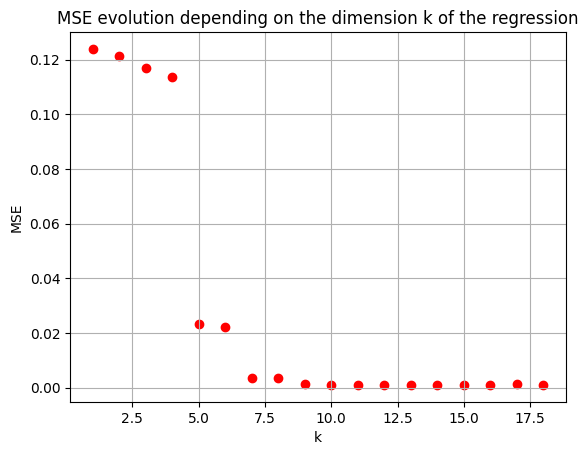

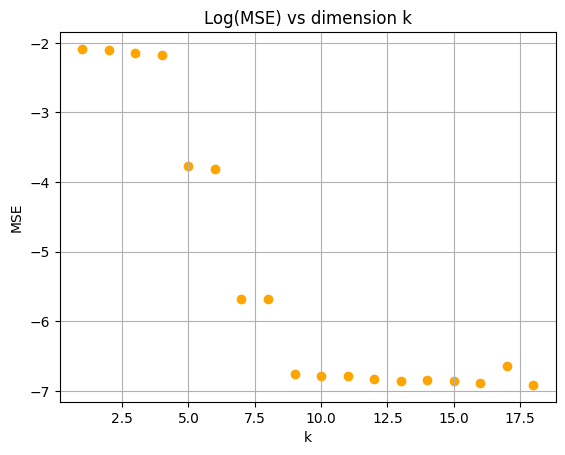

In [5]:
def mse_regression_k_train(x, y, coeffs):
    """
    Calculates the MSE and the log of the MSE for each of the polynomial fitted to the dataset

    Parameters
    ----------
    x : numpy.ndarray
        Should be in one dimension, array containing the x-coordinates of the dataset used for 
        the regression.
    y : numpy.ndarray
        Same as x, should be in one dimension, array containing the y-coordinate of the dataset
        used for the regression.
    coeffs : numpy.ndarray
        Coefficients of the polynomials calculated in the regression step

    Returns
    -------
    mse : numpy.ndarray
        Array of the size of coefficients, containing each MSE depending on the dimension
    log_mse : numpy.ndarray
        Array containing the log values of each mse calculated.
    """

    # Ensure x and y are numpy.ndarrays
    x = np.array(x)
    y = np.array(y)

    # Initialize outputs
    mse = np.zeros(len(coeffs))
    log_mse = np.zeros(len(coeffs))
    

    for k_i, coeff_i in enumerate(coeffs):

        # Creating the Vandermonde matrix containing the
        # powers of each elements of x, which will simplify the estimation
        # of the predicted values while being efficient calculations
        X = np.vander(x, len(coeff_i), increasing=True)

        # Estimating the y-values
        y_predicted = X @ coeff_i

        # Calculating the MSE (mean of the squared pair difference)
        mse[k_i] = np.mean((y_predicted - y)**2)

        # Calculating the log of the MSE
        log_mse[k_i] = np.log(mse[k_i])

    return mse, log_mse

def plot_mse(k_set, mse, save_fig: bool = False, c: str = "red", title_plot="fig1", title_save="fig1.png"):
    """
    Plotting the MSE of the fitted function 

    Parameters
    ----------
    k_set : numpy.ndarray
        Shape (18,) in our case. Contains all the values of k for the regression
    mse : numpy.ndarray
        Array containing all the MSE of each dimension
    save_fig : bool (optional)
        Choose whether saving or not the produced plot.
    c : str
        Color of the curve on the plot.
    title_plot : str
        Caption of the plot.
    title_save : str
        Title of the saved figure.
        
    Returns
    -------

    """

    plt.figure()
    plt.scatter(k_set, mse, c=c)
    plt.title(title_plot)
    plt.grid()
    plt.xlabel("k")
    plt.ylabel("MSE")
    if save_fig:
        plt.savefig(title_save, format='png', dpi=300, bbox_inches='tight')
    plt.show()


def regression_k_range18():
    """  
    Performing question 2.(b) regression on dimensions from 1 to 18

    Parameters
    ----------
    
    Returns
    -------
    k_set : numpy.ndarray
        Needed for the plots later
    coeff_k : numpy.ndarray
        Contains the coefficients of the regression for each dimension in k_set
    """

    # Defining the dimensions ranging from 1 to 18
    k_set = np.arange(1, 19)
    
    # Performing the regression on the dataset, given the dimensions
    coeff_k = regression_k(x_data, y_data, specific_dims=True, dims=k_set)
    
    # Calculating the MSE and log(MSE)
    mse, log_mse = mse_regression_k_train(x_data, y_data, coeff_k)

    # Plotting the results
    plot_mse(k_set, mse, False, "red", "MSE evolution depending on the dimension k of the regression",
             "Part 1 Figures/mse_train_q1.png")
    
    plot_mse(k_set, log_mse, False, c="orange", title_plot="Log(MSE) vs dimension k", 
             title_save="Part 1 Figures/logmse_train_q1.png")

    return k_set, coeff_k


# Executing the script we wrote
k_set, coeff_k = regression_k_range18()

### 1.1: Question 2.(c)

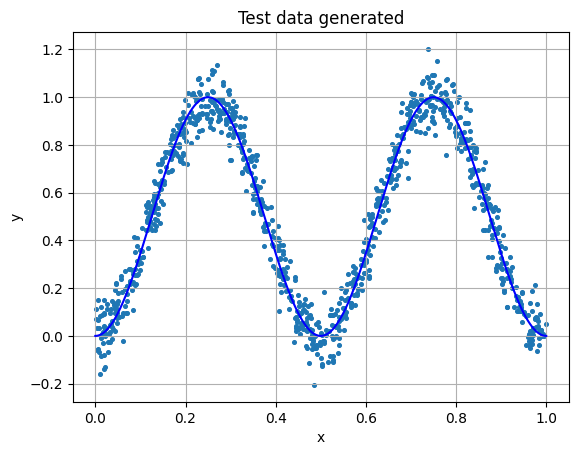

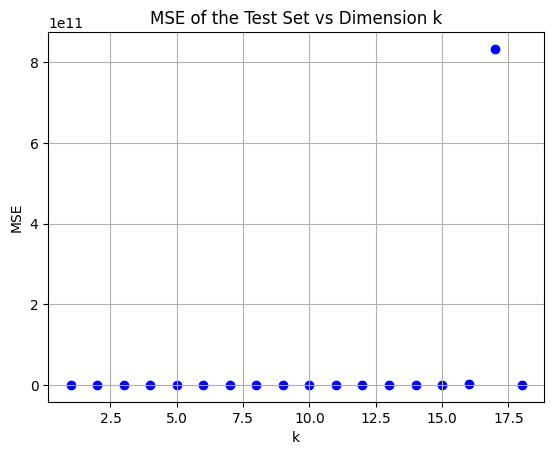

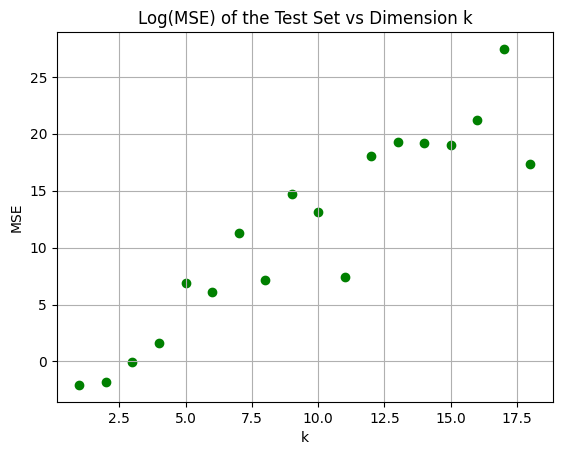

In [6]:
def mse_regression_k_test(x, y, coeff):
    """ 
    Calculating the MSE of the test set, given the coefficients and the x and y datasets for test

    Parameters
    ----------
    x : numpy.ndarray
        Should be in one dimension, array containing the x-coordinates of the test dataset used for 
        the regression.
    y : numpy.ndarray
        Same as x, should be in one dimension, array containing the y-coordinate of the test dataset
        used for the regression.
    coeff : numpy.ndarray
        Coefficients of the polynomials calculated in the regression step

    Returns
    -------
    mse_test : numpy.ndarray
        Contains the MSE of each dimension.
    log_mse_test : numpy.ndarray
        Contains the log(MSE) for each dimension.
    """

    # Ensuring the inputs are numpy.ndarray
    x = np.array(x)
    y = np.array(y)

    # Initializing the outputs
    mse_test = np.zeros(len(coeff))
    log_mse_test = np.zeros(len(coeff))

    # Calculating the MSE and its log for each coefficient list in the coeff array.
    for i in range(len(coeff)):
        y_predicted = np.polyval(coeff[i], x)
        mse = np.mean((y_predicted - y)**2)
        mse_test[i] = mse
        log_mse_test[i] = np.log(mse)

    return mse_test, log_mse_test

def testing_data_gen():
    """ 
    Generates the 1000 test data points

    Parameters
    ----------

    Returns
    -------
    x_test : np.ndarray
        Shape (1000,), containing all the x-coordinates for testing points
    y_test : numpy.ndarray
        Shape (1000,), containing all the y-coordinates for testing points
    """
    n_test_sample = 1000
    var_norm = 0.07
    
    noise_test = normal_samples(0, var_norm, n_test_sample)
    x_test = uniform_samples(0, 1, n_test_sample)
    y_test = g_sig(x_test, noise_test)

    return x_test, y_test

# Test set generated
x_test, y_test = testing_data_gen()

# Plotting the test set data
plot_data_q2(x_test, y_test, False, title="Part 1 Figures/test_set_q2.png", title_plot="Test data generated")

# Calculating the MSE of the Test Set and its log
mse_test, log_mse_test = mse_regression_k_test(x_test, y_test, coeff_k)

# Plotting the MSE and log(MSE)
plot_mse(k_set, mse_test, False, c="blue", title_plot="MSE of the Test Set vs Dimension k",
         title_save="Part 1 Figures/mse_test_q1.png")

plot_mse(k_set, log_mse_test, False, c="green", title_plot="Log(MSE) of the Test Set vs Dimension k",
         title_save="Part 1 Figures/logmse_test_q1.png")

### 1.1: Question 2.(d)

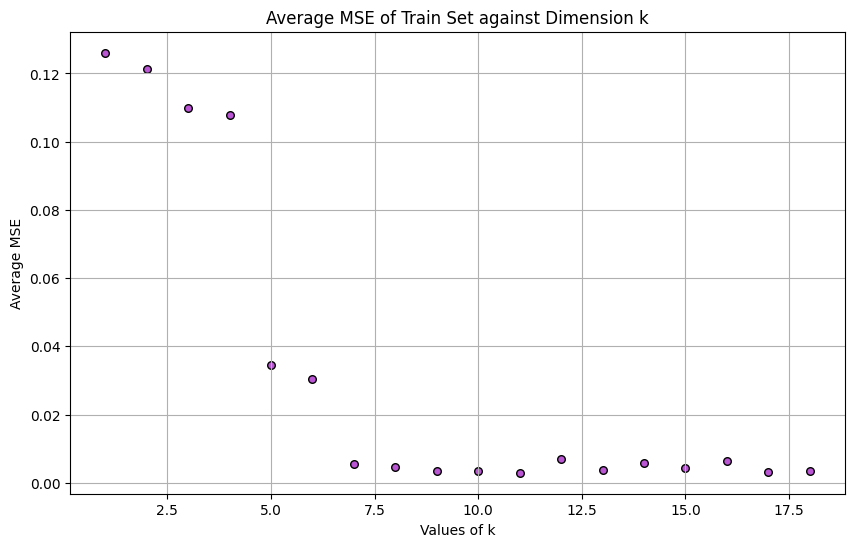

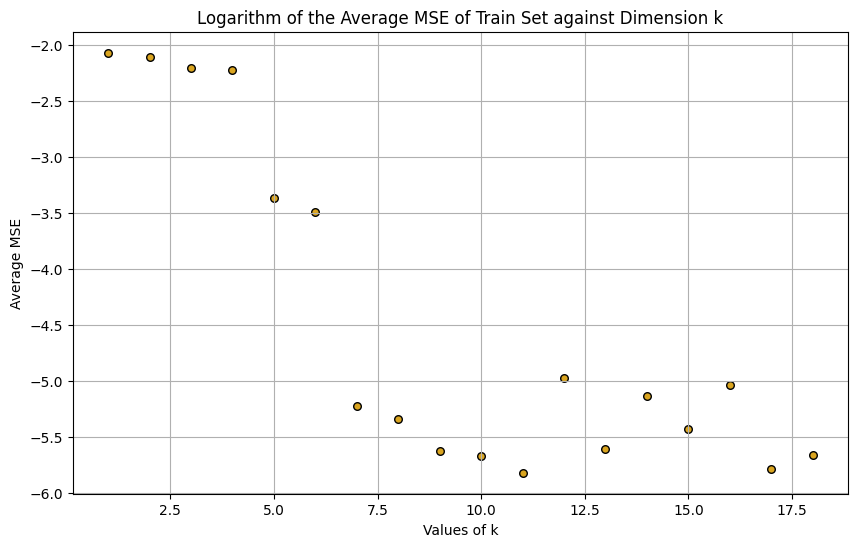

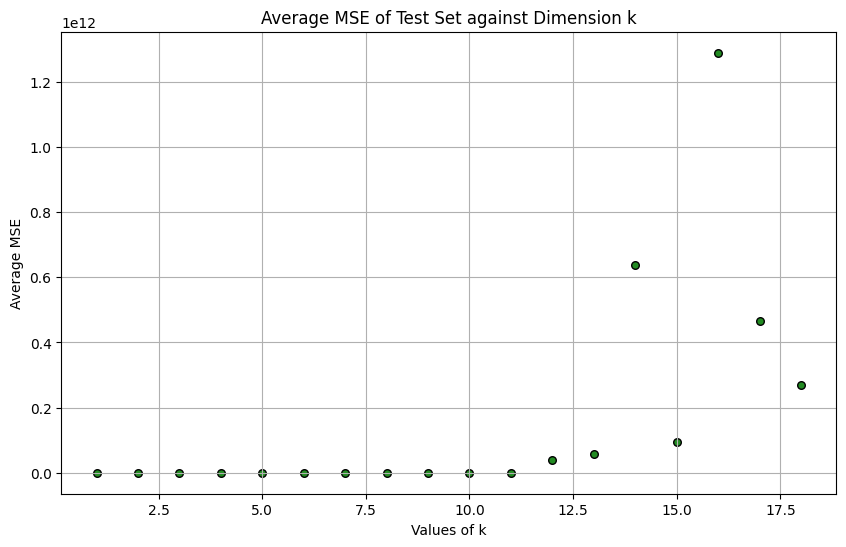

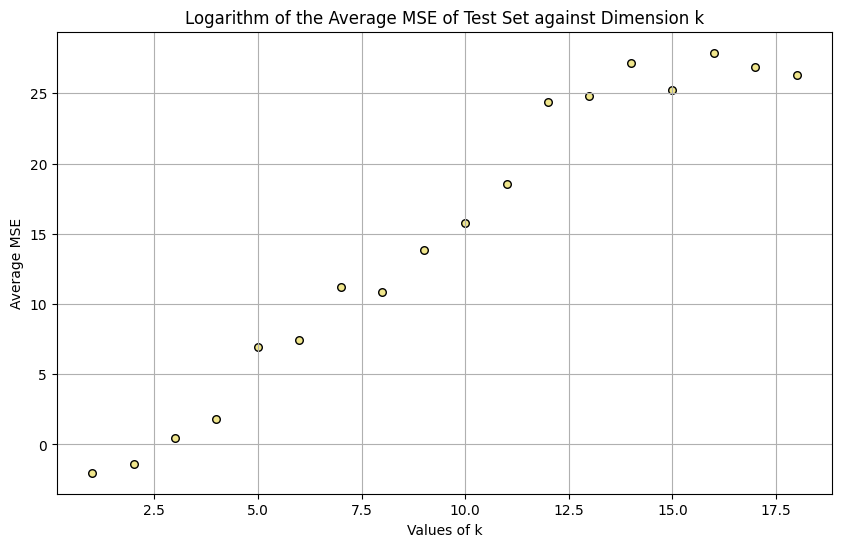

In [7]:
def plot_average_mse(k_set, average_mse, c : str ='red', label : str='label1', save_fig=False, 
                     title_plot="Plot 1", title_save="Plot1.png"):
    
    plt.figure(figsize=(10,6))
    plt.scatter(k_set, average_mse, s=30, c=c, label=label, edgecolors='black')
    plt.title(title_plot)
    plt.xlabel("Values of k")
    plt.ylabel('Average MSE')
    plt.grid()
    if save_fig:
        plt.savefig(title_save, format='png', dpi=300, bbox_inches='tight')
    plt.show()


def run_train_test(n_iter: int=100):
    """ 
    Running again part (b) and (c) and plotting the average results over a specified number of runs

    Parameters
    ----------
    n_inter : int
        Number of runs of the parts (b) and (c)

    Returns
    -------
    average_mse_train : list
        List containing the averaged MSE (over n_iter runs) of the training datasets for each dimension k
    average_mse_test : list
        List containing the averaged MSE (over n_iter runs) of the testing datasets for each dimension k
    """
    
    # Initializing the outputs
    average_mse_train = []
    average_mse_test = []

    k_set = np.arange(1, 19)

    # Running the outer loop over the dimensions
    for k in k_set:
        
        # Defining a list to store the MSE of each run for train and test 
        # We will average this list at the end to have the average MSE over a dimension for 100 runs.
        mse_train_run = []
        mse_test_run = []

        # Running the inner loop over the number of iterations defined (n_iter)
        for _ in range(n_iter):

            # Generating the training data, and performing regression over it
            x_data, y_data = training_data_gen()
            coeff_train = regression_k(x_data, y_data, specific_dims=True, dims=[k])

            # Calculating the error for the training set and adding it to the list 
            # containing the MSE of each run for training set
            error_train, _ = mse_regression_k_train(x_data, y_data, coeff_train)
            mse_train_run.append(error_train)

            # Generating the test data
            x_test, y_test = testing_data_gen()

            # Calculating the estimated points (using the coeffs) and the error for the test set
            # and adding it to the list containing the MSE of each run for testing set
            error_test, _ = mse_regression_k_test(x_test, y_test, coeff_train)
            mse_test_run.append(error_test)

        # Averaging the 100 run MSE of training set over dimension k's runs, and storing it
        average_error_train = (1/len(mse_train_run))*np.sum(mse_train_run)
        average_mse_train.append(average_error_train)

        # Same operation for test set
        average_error_test = (1/len(mse_test_run))*np.sum(mse_test_run)
        average_mse_test.append(average_error_test)


    # Plotting the obtained results (both MSE and Log(MSE) for train and testing datasets)
    plot_average_mse(k_set, average_mse_train, c='mediumorchid', label='train_error',
                     save_fig=False, title_plot="Average MSE of Train Set against Dimension k",
                     title_save="Part 1 Figures/mean_mse_train.png")
    
    plot_average_mse(k_set, np.log(average_mse_train), c='goldenrod', label='logtrain_error', 
                     save_fig=False, title_plot="Logarithm of the Average MSE of Train Set against Dimension k",
                     title_save="Part 1 Figures/logmean_mse_train.png")

    plot_average_mse(k_set, average_mse_test, c='forestgreen', label='test_error',
                     save_fig=False, title_plot="Average MSE of Test Set against Dimension k",
                     title_save="Part 1 Figures/mean_mse_test.png")

    plot_average_mse(k_set, np.log(average_mse_test), c='khaki', label='logtest_error',
                     save_fig=False, title_plot="Logarithm of the Average MSE of Test Set against Dimension k",
                     title_save="Part 1 Figures/logmean_mse_test.png")

    return average_mse_train, average_mse_test

# Running the function we created
average_mse_train, average_mse_test = run_train_test()

### 1.1: Question 3

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def vander_sin(x, k):
    """ 
    Creating the Vandermonde-like matrix that will contain the sin(k pi x) varying:
    - on each column for the values of k
    - on each row for the values of x

    Parameters
    ----------
    x : 

    k : int
        The maximum dimension we want
    Returns
    -------
    """
 
    k_range = np.arange(1, k+1)
    x = np.array(x)
    x = x[:, np.newaxis]
    X = np.sin(np.pi*x* k_range)

    return X


def sin_poly_regression(x, y, k):
    """ 
    Computing the regression over dataset using the sinusoidal basis up to dimension k.

    Parameters
    ----------
    x : numpy.ndarray
        data values for x-axis for the created dataset
    y : numpy.ndarray
        data values for y-axis for the created dataset
    k : numpy.ndarray
        dimension of the regression to use in sin basis

    OUTPUTS
    w : numpy.ndarray
        Vector containing the coefficients calculated in the regression
    """

    # Ensuring the inputs are numpy ndarrays
    x = np.array(x)
    y = np.array(y)
    
    # Calculating the Vandermonde-like matrix created before
    X = vander_sin(x, k)

    # Solving to find the weights in the regression
    w = np.linalg.solve(X.T @ X, X.T @ y)
    
    return w


def sinusoidal_function(coeff, k, min=0, max=1, num_points=1000):
    """ 
    Calculates the values of the fitted function given its coefficient, for sinusoidal basis.

    Parameters
    ----------
    coeff : numpy.ndarray
        Contains the calculated coefficients for the fitted polynomial
    k : int
        Dimension for the regression
    min : float (optional)
        Minimum x-value for the polynomial function fitted to be plotted.
    max : float (optional)
        Maximum x-value for the polynomial function fitted to be plotted.
    num_points : int (optional)
        Number of points on the x-axis for the polynomial function.

    Returns
    -------
    x_range : numpy.ndarray
        The x-coordinates corresponding to the range [min, max]
    y_sin : numpy.ndarray
        The y-coordinates of the fitted function on range [min, max] for sine basis
    """

    x_range = np.linspace(min, max, num_points)
    k = len(coeff)
    X = vander_sin(x_range, k)

    y_sin = X @ coeff

    return x_range, y_sin


def regression_sin_k(x, y, k: int = 2, specific_dims: bool = False, dims = [2]):
    """ 
    Performs the regression the given dataset, for the sinusoidal basis only

    Parameters
    ----------
    x : np.ndarray
        Should be in one dimension, array containing the x-coordinates of the dataset used for 
        the regression.
    y : np.ndarray
        Same as x, should be in one dimension, array containing the y-coordinate of the dataset
        used for the regression.
    k : int
        The regression is performed on every value from 1 to k.
    specific_dims : bool (optional)
        If set to True, the regression is performed on the dataset in every dimension contained 
        in the list dims. 
        If not, the regression is performed on every dimension up to k.
    dims : list (optional)
        List containing all the dimensions k on which to perform the regressions if specific_dims is
        set to True.

    Returns
    -------
    all_coeffs : np.ndarray
        Contains the lists of coefficients for the fitted polynomial to the dataset.
    """

    # Working the same as the function regression_k, but for sine basis
    if not specific_dims:
        all_coeffs = np.empty(k, dtype=object)

        for start in range(0, k):
            all_coeffs[start] = np.array(sin_poly_regression(x, y, (start+1)))

    else:
        all_coeffs = np.empty(len(dims), dtype=object)

        index = 0
        for k_i in dims:
            all_coeffs[index] = np.array(sin_poly_regression(x, y, k_i))
            index += 1

    return all_coeffs


def sin_k_polynomials_plot(x_data, y_data, coeff_data, k_set: list):
    """ 
    Plots the fitted functions for sine basis

    Parameters
    ----------
    x_data : numpy.ndarray
        Contains the x-coordinates of the training dataset
    y_data : numpy.ndarray
        Contains the y-coordinates of the training dataset
    coeff_data : numpy.ndarray
        Contains the coefficients of all the fitted polynomials to the dataset.
    k_set : list
        Contains the dimensions k, used for labels of the plot.
    
    Returns
    -------

    """

    # Again, it works the same as the k_polynomial_plot() function made before
    # but adapted for the sine function
    x = np.empty(len(coeff_data), dtype=object)
    y = np.empty(len(coeff_data), dtype=object)

    for i, c in enumerate(coeff_data):
        x[i], y[i] = sinusoidal_function(c, k_set[i])

    base = np.linspace(0, 1, 10000)
    colors = ["red", "green", "peru", "coral", "darkorchid"]
    labels = k_set

    plt.figure()
    plt.plot(base, sine_func(base), color='blue', linewidth=2)
    plt.scatter(x_data, y_data, s=15)
    for i in range(len(x)):
        plt.plot(x[i], y[i], color=colors[i], label=labels[i]) 
    plt.grid()
    plt.legend()
    plt.title("Sinusoidal Basis Regressions")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.2, 1.2])
    plt.savefig("Part 1 Figures/sin_k_regression.png", format='png', dpi=300, bbox_inches='tight')
    plt.show()


def run_train_test_sin(n_iter: int=100):
    """ 
    Running again part (b) and (c) and plotting the average results over a specified number of runs
    for SINE BASIS

    Parameters
    ----------
    n_inter : int
        Number of runs of the parts (b) and (c)

    Returns
    -------
    average_mse_train : list
        List containing the averaged MSE (over n_iter runs) of the training datasets for each dimension k
    average_mse_test : list
        List containing the averaged MSE (over n_iter runs) of the testing datasets for each dimension k
    """
    
    # A function working exactly the same as before, but adapted for sine basis
    average_mse_train = []
    average_mse_test = []

    k_set = np.arange(1, 19)

    for k in k_set:
        
        mse_train_run = []
        mse_test_run = []

        for _ in range(n_iter):
            x_data, y_data = training_data_gen()
            coeff_train = regression_sin_k(x_data, y_data, specific_dims=True, dims=[k])

            error_train, _ = mse_regression_k_train(x_data, y_data, coeff_train)
            mse_train_run.append(error_train)

            x_test, y_test = testing_data_gen()

            error_test, _ = mse_regression_k_test(x_test, y_test, coeff_train)
            mse_test_run.append(error_test)

        average_error_train = (1/len(mse_train_run))*np.sum(mse_train_run)
        average_mse_train.append(average_error_train)

        average_error_test = (1/len(mse_test_run))*np.sum(mse_test_run)
        average_mse_test.append(average_error_test)


    plot_average_mse(k_set, average_mse_train, c='mediumorchid', label='train_error', 
                     save_fig=False, title_plot="Average MSE of Train Set against Dimension k for Sine Basis",
                     title_save="Part 1 Figures/mean_mse_train_sin.png")
    
    plot_average_mse(k_set, np.log(average_mse_train), c='goldenrod', label='logtrain_error', 
                     save_fig=False, title_plot="Logarithm of the Average MSE of Train Set against Dimension k for Sine Basis",
                     title_save="Part 1 Figures/logmean_mse_train_sin.png")
    
    plot_average_mse(k_set, average_mse_test, c='forestgreen', label='test_error', 
                     save_fig=False, title_plot="Average MSE of Test Set against Dimension k for Sine Basis",
                     title_save="Part 1 Figures/mean_mse_test_sin.png")
    
    plot_average_mse(k_set, np.log(average_mse_test), c='khaki', label='logtest_error', 
                     save_fig=False, title_plot="Logarithm of the Average MSE of Test Set against Dimension k for Sine Basis",
                     title_save="Part 1 Figures/logmean_mse_test_sin.png")

    return average_mse_train, average_mse_test


def regression_k_sin_range18():
    """ 
    The equivalent of regression_k_range18() for sine basis

    Parameters
    ----------

    Returns
    -------
    k_set : numpy.ndarray
        Needed for the plots later
    coeff_sin_k : numpy.ndarray
        Contains the coefficients of the regression for each dimension in k_set

    """

    k_set = np.arange(1, 19)

    coeff_sin_k = regression_sin_k(x_data, y_data, specific_dims=True, dims=k_set)

    mse_sin, log_mse_sin = mse_regression_k_train(x_data, y_data, coeff_sin_k)

    plot_mse(k_set, mse_sin, c="red", save_fig=False, title_plot="MSE evolution depending on dimension k for sine basis",
             title_save="Part 1 Figures/mse_train_sin.png")
    
    plot_mse(k_set, log_mse_sin, c="orange", save_fig=False, title_plot="Log(MSE) vs dimension k for sine basis",
             title_save="Part 1 Figures/logmse_train_sin.png")
    
    return k_set, coeff_sin_k

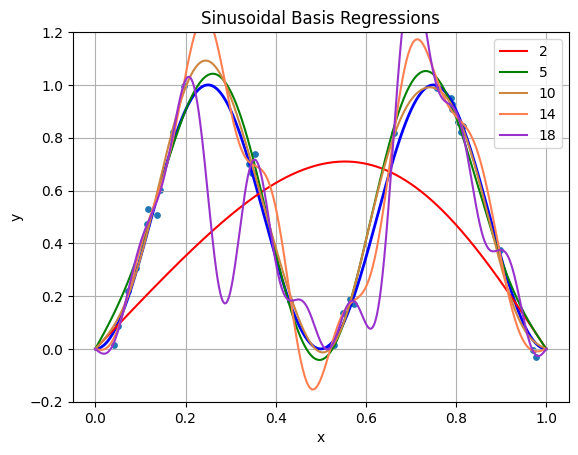

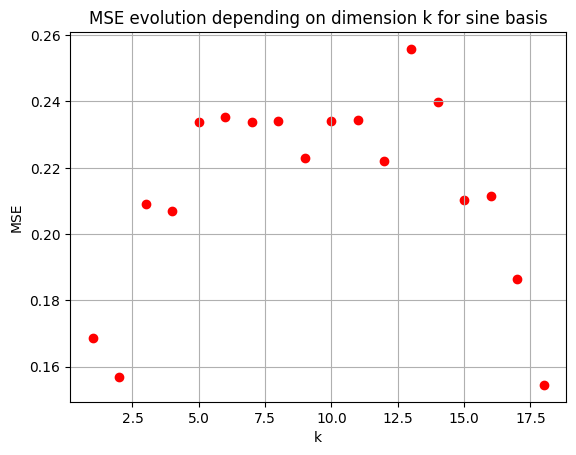

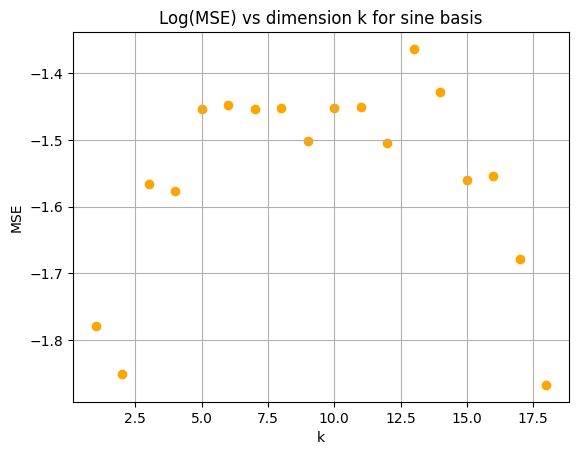

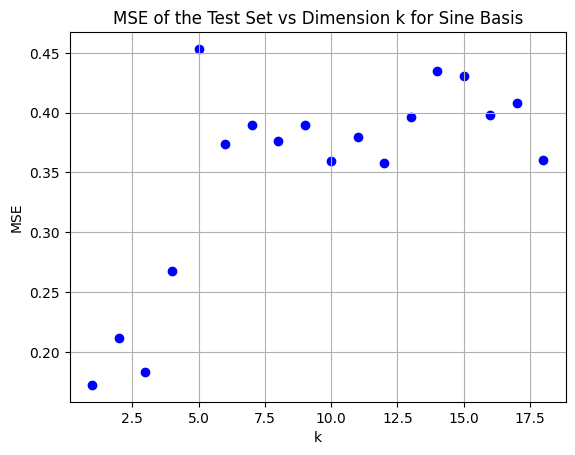

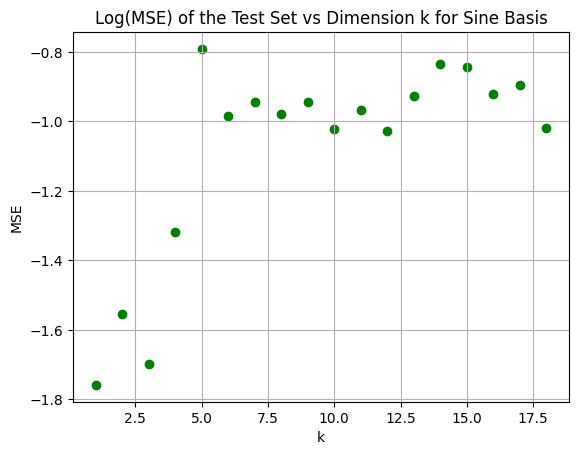

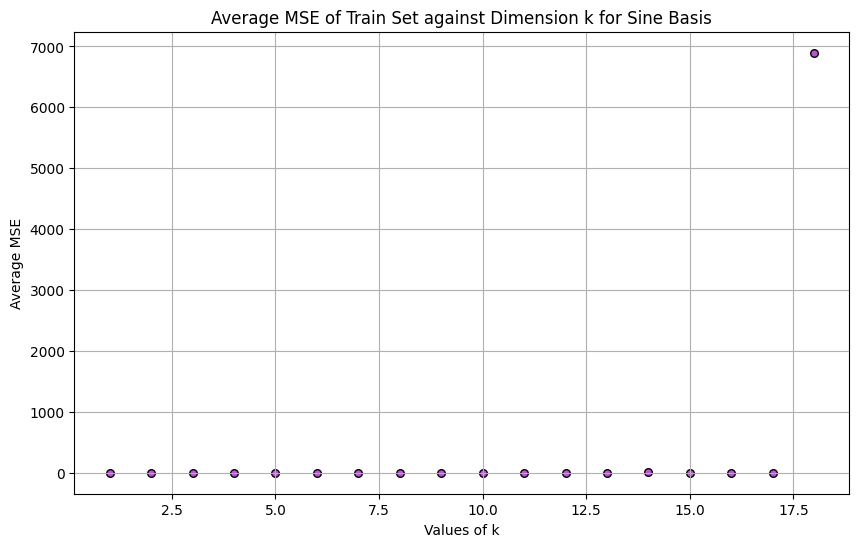

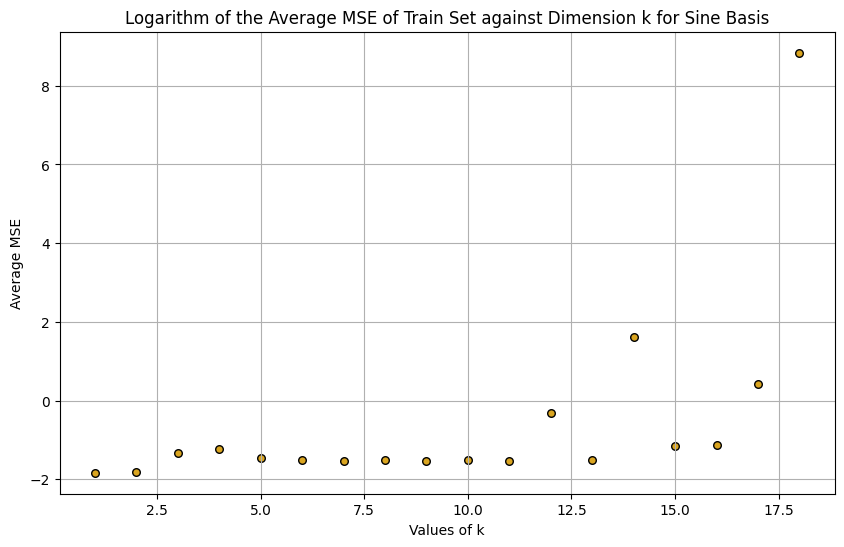

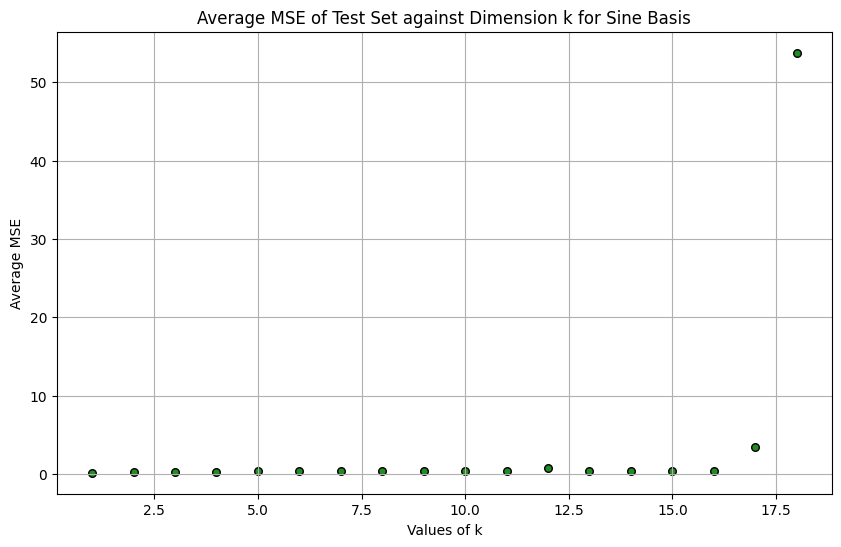

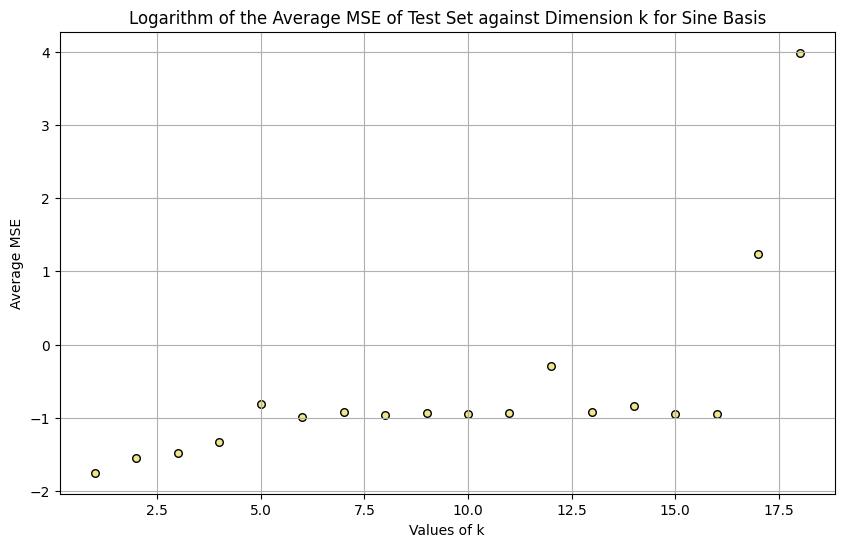

In [ ]:
# Question (2).a.ii just for visualization, 
# using the same x_data and y_data as before
test_k_set = [2, 5, 10, 14, 18]
test_coeff_sin_k = regression_sin_k(x_data, y_data, specific_dims=True, dims=test_k_set)
coeff = []
for i in range(np.shape(test_coeff_sin_k)[0]):
    #if i % 4 == 0:
    coeff.append(test_coeff_sin_k[i])
sin_k_polynomials_plot(x_data, y_data, coeff, test_k_set)



# MSE Part for k in [1, 18]

# Define the k_set as [1, 18] and calculate the regression over dimensions 1 to 18, 
# using sinusoid basis. It also calculates and plot the MSE and log(MSE) of the training
# data. We use the same x_data and y_data as before.
k_set, coeff_sin_k = regression_k_sin_range18()

# Generating a test set
x_test, y_test = testing_data_gen()

# Calculating the MSE of the test set
mse_test_sin, log_mse_test_sin = mse_regression_k_test(x_test, y_test, coeff_sin_k)

plot_mse(k_set, mse_test_sin, save_fig=False, c='blue', title_plot="MSE of the Test Set vs Dimension k for Sine Basis",
         title_save="Part 1 Figures/mse_test_q1.png")

plot_mse(k_set, log_mse_test_sin, save_fig=False, c="green", title_plot="Log(MSE) of the Test Set vs Dimension k for Sine Basis",
         title_save="Part 1 Figures/logmse_test_sin.png")

average_mse_train_sin, average_mse_test_sin = run_train_test_sin()